<a href="https://colab.research.google.com/github/Mayank-004/Timeseries-classification-using-XGBOOST/blob/main/largeKitchenappliances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing 




## Importing the libraries

In [316]:
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import matplotlib
from sklearn.metrics import auc
from numpy import abs

random.seed(786)
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve,precision_recall_curve,plot_precision_recall_curve




## Importing the dataset







In [332]:
from scipy.io import arff

data = arff.loadarff('LargeKitchenAppliances_TRAIN.arff')
dataset = pd.DataFrame(data[0])


dataset

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720,target
0,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,...,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,b'1'
1,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,...,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,b'1'
2,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,...,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,b'1'
3,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,...,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,b'1'
4,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.14057

In [318]:
dataset['target'].unique()

array([b'1', b'2', b'3'], dtype=object)

In [333]:
dataset['target'] = dataset['target'].apply(lambda x: 0 if x == b'1' else ( 1 if x== b'2' else 2))


In [ ]:
numeric_col=list(dataset.select_dtypes(include=["number"]))
numeric_col

In [ ]:
dataset.boxplot(numeric_col)


In [334]:
from numpy import mean
from numpy import std
# calculate summary statistics
data_mean, data_std = mean(dataset), std(dataset)
# identify outliers
cut_off = data_std * 2
lower, upper = data_mean - cut_off, data_mean + cut_off

In [335]:
#column_list=list(dataset.columns.values)

for i in range(dataset.shape[1]):
  for j in range(len(dataset)):
    if dataset.iloc[j,i]<=lower[i]:
      dataset.iloc[j,i]= np.nan


for i in range(dataset.shape[1]):
  for j in range(len(dataset)):
    if dataset.iloc[j,i]>=upper[i]:
      dataset.iloc[j,i]= np.nan

In [327]:
dataset.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720,target
count,366.000000,364.000000,365.000000,366.000000,368.000000,366.000000,365.000000,366.000000,366.000000,370.000000,368.000000,370.000000,369.000000,370.000000,368.000000,369.000000,369.000000,369.000000,370.000000,370.000000,368.000000,368.000000,369.000000,369.000000,371.000000,371.000000,370.000000,370.000000,368.000000,370.000000,371.000000,370.000000,371.000000,371.000000,371.000000,372.000000,372.000000,373.000000,372.000000,360.000000,...,363.000000,364.000000,364.000000,364.000000,366.000000,367.000000,366.000000,365.000000,365.000000,364.000000,363.000000,363.000000,366.000000,366.000000,366.000000,368.000000,367.000000,368.000000,370.000000,368.000000,370.000000,372.000000,371.000000,371.000000,371.000000,371.000000,371.000000,370.000000,370.000000,369.000000,369.000000,369.000000,369.000000,369.000000,366.000000,368.000000,369.000000,369.000000,370.000000,375.000000
mean,-0.133335,-0.168737,-0.163852,-0.170340,-0.173503,-0.169163,-0.171259,-0.169287,-0.176612,-0.178729,-0.180567,-0.171219,-0.175414,-0.174451,-0.180858,-0.173345,-0.173871,-0.175200,-0.178832,-0.177200,-0.172910,-0.181655,-0.172425,-0.171681,-0.175818,-0.173924,-0.173845,-0.171747,-0.174130,-0.178471,-0.172427,-0.175103,-0.173372,-0.176410,-0.176489,-0.174581,-0.174399,-0.171843,-0.175244,-0.175080,...,-0.161872,-0.166693,-0.164184,-0.170995,-0.164135,-0.167044,-0.169710,-0.172155,-0.172978,-0.164946,-0.171041,-0.174184,-0.167152,-0.172229,-0.175316,-0.172235,-0.180483,-0.177148,-0.171753,-0.176247,-0.173212,-0.171436,-0.175310,-0.178698,-0.173655,-0.178181,-0.179323,-0.173961,-0.177146,-0.178438,-0.184665,-0.178714,-0.178875,-0.185298,-0.180010,-0.166976,-0.180207,-0.184840,-0.179283,1.000000
std,0.378033,0.141277,0.161506,0.126747,0.112403,0.163225,0.158248,0.171242,0.106221,0.094823,0.125523,0.134668,0.104240,0.109474,0.084723,0.111524,0.114473,0.108538,0.128714,0.096647,0.115031,0.118768,0.130774,0.124118,0.107513,0.113334,0.106756,0.117763,0.108318,0.102749,0.118114,0.107488,0.116798,0.105468,0.103790,0.107265,0.112254,0.117752,0.104199,0.059790,...,0.137190,0.157051,0.131030,0.095955,0.129997,0.107472,0.094427,0.100619,0.148726,0.146457,0.125378,0.095029,0.135632,0.113382,0.099249,0.116971,0.129868,0.095076,0.120206,0.089219,0.107150,0.118382,0.103250,0.086666,0.105304,0.085729,0.085317,0.112293,0.102854,0.095286,0.113725,0.095115,0.095057,0.115944,0.095036,0.210741,0.093780,0.117153,0.101356,0.817587
min,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.397756,...,-0.592658,-1.575090,-0.592658,-0.592658,-0.592658,-0.592658,-0.592658,-0.592658,-1.575090,-0.592658,-0.592658,-0.592658,-0.592658,-0.592658,-0.626405,-0.646395,-1.575090,-0.654390,-0.638399,-0.646395,-0.674380,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,0.000000
25%,-0.206967,-0.207206,-0.207200,-0.206027,-0.206502,-0.206967,-0.207223,-0.206967,-0.207217,-0.207217,-0.207355,-0.206967,-0.205297,-0.206027,-0.207206,-0.206270,-0.206270,-0.206270,-0.206967,-0.206027,-0.205540,-0.207206,-0.207223,-0.207200,-0.2072

In [328]:
dataset.dropna(inplace=True)

In [329]:
dataset.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720,target
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
if dataset.iloc[1,1]<lower[1]:
   dataset.iloc[1,1]='99999'

In [256]:
dataset.shape[1]

721

In [220]:

for i in range(len(dataset)):
  max_thres.iloc[:,i]=dataset.iloc[:,i].quantile(0.95)
max_thres

AttributeError: ignored

In [216]:
dataset.iloc[:,1]

0     -0.099108
1     -0.155256
2     -0.100082
3     -0.140671
4     -0.140576
         ...   
370   -0.457814
371   -0.312653
372   -0.206270
373   -0.175033
374   -0.131219
Name: att2, Length: 375, dtype: float64

In [ ]:
dataset[dataset]

In [226]:
from scipy import stats
dataset[(dataset.abs(stats.zscore(dataset)) < 3)]

TypeError: ignored

In [234]:
q_low=[]
for i in column_list:
  q_low = dataset[i].quantile(0.01)
  q_hi  = dataset[i].quantile(0.99)

df_filtered = df[(df["col"] < q_hi) & (df["col"] > q_low)]

TypeError: ignored

In [ ]:
outliers=[]

def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    

In [179]:
dataset.dropna(inplace=True)

In [180]:
dataset.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720,target
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,...,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,0.088484,0.017864,-0.026741,-0.031323,-0.038759,-0.006532,-0.001379,-0.018546,-0.030925,-0.082533,-0.054984,-0.089291,-0.077022,-0.088442,-0.105359,-0.030207,-0.075022,-0.083191,-0.091507,-0.103185,-0.069279,-0.081615,-0.080680,-0.084752,-0.119976,-0.128466,-0.101225,-0.088674,-0.078793,-0.110446,-0.101340,-0.105004,-0.123589,-0.125299,-0.134699,-0.133297,-0.138630,-0.135314,-0.134838,-0.172682,...,-0.013348,-0.025311,-0.025170,-0.055209,-0.070050,-0.097078,-0.090612,-0.071647,-0.048575,-0.015050,-0.018066,-0.017742,-0.068686,-0.065754,-0.055830,-0.061589,-0.076696,-0.083428,-0.112331,-0.106942,-0.108433,-0.121018,-0.114550,-0.155121,-0.130696,-0.155117,-0.155171,-0.125256,-0.098727,-0.072425,-0.076904,-0.070594,-0.073172,-0.084466,-0.043241,0.010751,-0.064955,-0.074110,-0.085435,1.000000
std,1.790828,1.178260,0.938110,0.994872,1.028598,1.115328,1.051750,1.048959,1.019400,0.887769,0.969387,0.756822,0.832159,0.777194,0.701502,1.345180,0.840837,0.772357,0.786676,0.705338,0.835325,0.809685,0.786403,0.732449,0.578671,0.568966,0.662838,0.729613,0.754213,0.703551,0.695705,0.644071,0.612747,0.528609,0.463540,0.607980,0.621610,0.603310,0.605101,0.117208,...,0.885785,0.865760,0.847020,0.711749,0.637284,0.580049,0.556916,0.640845,0.803914,0.898301,0.885267,0.897867,0.728228,0.718873,0.802111,0.816895,0.758411,0.719326,0.561101,0.631271,0.604087,0.576804,0.605209,0.384403,0.455227,0.276067,0.384386,0.482795,0.704004,0.850635,0.865203,0.865857,0.845686,0.819517,0.911641,1.636248,0.956432,0.922845,0.864145,0.817587
min,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,...,-0.592658,-1.575090,-0.592658,-0.592658,-0.592658,-1.575090,-0.592658,-0.592658,-1.575090,-0.592658,-0.592658,-0.592658,-1.575090,-0.592658,-0.626405,-0.646395,-1.575090,-0.654390,-0.638399,-1.575090,-0.674380,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,0.000000
25%,-0.204997,-0.204997,-0.204997,-0.204566,-0.204997,-0.204997,-0.205783,-0.204997,-0.205783,-0.206735,-0.206735,-0.205783,-0.204566,-0.204997,-0.206735,-0.204997,-0.204997,-0.204997,-0.205783,-0.204997,-0.204566,-0.205783,-0.206735,-0.205783,-0.206735,

Filling missing values of Target column MOIC

In [336]:
# check missing value in dataset
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
att438,23,6.133333
att440,22,5.866667
att442,22,5.866667
att439,22,5.866667
att317,22,5.866667
...,...,...
att161,2,0.533333
att159,2,0.533333
att135,2,0.533333
att84,2,0.533333


In [331]:
dataset

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720,target


In [148]:
# checking if dataset is balanced or imbalanced
dataset['target'].value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: target, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


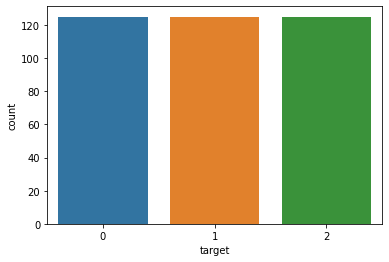

In [149]:
sn.countplot(dataset['target'])


In [150]:
'''# Correlation Matrix
corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()'''

'# Correlation Matrix\ncorrMatrix= dataset.corr()\n\nfig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches\n\nsn.heatmap(corrMatrix, annot=True,linewidth=0.8)\nplt.show()'

In [151]:
'''# Drop Column with perfect correlation
dataset.drop(columns={"icu"}, axis=1, inplace=True)'''

'# Drop Column with perfect correlation\ndataset.drop(columns={"icu"}, axis=1, inplace=True)'

In [152]:
X = dataset.loc[:,dataset.columns!='target']
Y = dataset['target']


In [153]:
from sklearn.preprocessing import MinMaxScaler


scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X)
X = scaling.transform(X)

## Splitting the dataset into the Training set and Test set

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 786,stratify=Y)

### Building Models

Defining Function for Model Performance evaluation

In [155]:
def eval_result(model_name,X,y,y_pred):
    from matplotlib import pyplot as plt

    train_accuracy = accuracy_score(y, y_pred)
    print(f'accuracy is {train_accuracy}')
    
    #plot_roc_curve(model_name, X, y)

    #plot_precision_recall_curve(model_name,X,y)
    print(classification_report(y,y_pred,digits=5))
    plot_confusion_matrix(model_name, X, y,cmap=plt.cm.pink, normalize = 'all')


In [156]:
# user defined function to calculate model training time

def run_model(model,X_train,y_train,verbose=True):
    t0=time.time()
    if verbose== False:
        model.fit(X_train,y_train.ravel(),verbose=0,early_stopping_rounds=10, eval_metric="logloss")
    else :
        model.fit(X_train,y_train.ravel())
    
    time_taken= time.time()- t0

    print(f'Time taken: {time_taken}')

### XGBOOST 

In [157]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
 
#xgb = XGBClassifier(objective='multi:softmax',num_class=3)

xgb = XGBClassifier(random_state=0,objective='multi:softmax')

params = {
   "learning_rate"   : [0.05, 0.10, 0.15, 0.20, 0.30],
    "max_depth"       : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma"           : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}


clf = RandomizedSearchCV(xgb ,
                         param_distributions = params, 
                         cv=5,
                         scoring="accuracy",
                         n_jobs= 10,
                         verbose = 1,
                         random_state=786)


run_model(clf,X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   49.2s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:  1.2min finished


Time taken: 74.91098999977112


In [158]:
print(clf.best_estimator_)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [159]:
y_predtest= clf.predict(X_test)

y_predtrain = clf.predict(X_train)

accuracy is 1.0
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       100
           1    1.00000   1.00000   1.00000       100
           2    1.00000   1.00000   1.00000       100

    accuracy                        1.00000       300
   macro avg    1.00000   1.00000   1.00000       300
weighted avg    1.00000   1.00000   1.00000       300



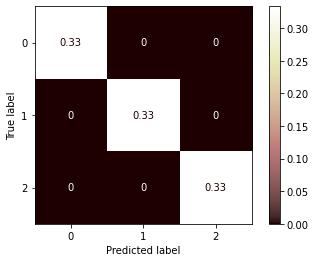

In [160]:
eval_result(clf,X_train,y_train,y_predtrain)

accuracy is 0.6
              precision    recall  f1-score   support

           0    0.63158   0.48000   0.54545        25
           1    0.73684   0.56000   0.63636        25
           2    0.51351   0.76000   0.61290        25

    accuracy                        0.60000        75
   macro avg    0.62731   0.60000   0.59824        75
weighted avg    0.62731   0.60000   0.59824        75



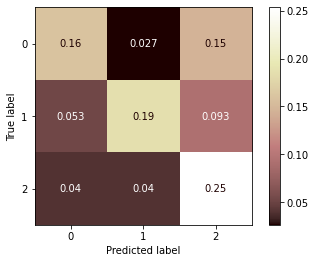

In [161]:
eval_result(clf,X_test,y_test,y_predtest)

In [162]:
# checking if distribution in target variable in train and test data is identical

#https://towardsdatascience.com/why-you-may-be-getting-low-test-accuracy-try-this-simpstatistical-tests-30585b7ee4fa

from scipy import stats
stats.ks_2samp(y_train,y_test)


Ks_2sampResult(statistic=0.0, pvalue=1.0)

statistics low value tells us that distribution is not much different and pvalue is one which tells us we cannot reject the null hypothesis that the distributions are actually identical because the pvalue is not small enough 